<!-- import sys;sys.path.append('../') -->

# EEW accuracy analysis
The following tutorial requires pyShake to be installed, see [the installation instructions][install].

## Read and Filter EEW solutions 
Using [eew_report2dict][eew_report2dict] and [reportfilter][reportfilter].

[eew_report2dict]: pyshake.html#pyshake.catalog.eew_report2dict
[reportfilter]: pyshake.html#pyshake.catalog.reportfilter
[install]: install.html#


In [2]:
agency      = 'insivumeh'
countrycode = 'gt'
countryname = 'guatemala'
ref_catalog = ('USGS','us')

from pyshake.catalog import eew_report2dict, reportfilter

# Read EEW solutions
EEWsolutions = eew_report2dict(files='/Users/fred/Documents/Data/ATTAC/alert/insivumeh/example/*txt')
print('%d solutions %d reports'%(sum([len(EEWsolutions[s]['Lon.']) for s in EEWsolutions]),len(EEWsolutions)))

# Filter EEW solutions
EEWsolutions = reportfilter(EEWsolutions,countrycodes=countrycode,dthresh=1.5)
print('%d filtered solutions %d filtered reports'%(sum([len(EEWsolutions[s]['Lon.']) for s in EEWsolutions]),len(EEWsolutions)))

3761 solutions 117 reports
2826 filtered solutions 87 filtered reports


## Get reference catalog and Match EEW solutions 
Using [getref][getref] and [matchreports][matchreports].

[getref]: pyshake.html#pyshake.catalog.getref
[matchreports]: pyshake.html#pyshake.catalog.matchreports


In [3]:
from pyshake.catalog import getref, matchreports 

# Get  reference catalog
Refsolutions = getref(EEWsolutions)
print('%d reports %d references'%(len(EEWsolutions),len(Refsolutions)))

# Match EEW solutions and reference catalog
EEWsolutions = matchreports(EEWsolutions,Refsolutions)  

87 reports 484 references
Similar origin times
193 reports with matching origin time
Similar origin locations
185 origin loc mismatchs


## Draw accuracy maps
Using [eew_accuracy][eew_accuracy]

[eew_accuracy]:pyshake.html#pyshake.catalog.eew_accuracy

27/87 F+ and 425/87 F-


/Users/fred/Documents/Projects/SED-EEW/ATTAC/pyShake/docs/../pyshake/util.py:251: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  events[e].depth = event[2]
/opt/homebrew/anaconda3/envs/quake/lib/python3.8/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "GEBCO_LATEST_SUB_ICE_TOPO" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/opt/homebrew/anaconda3/envs/quake/lib/python3.8/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "GEBCO_LATEST" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/opt/homebrew/anaconda3/envs/quake/lib/python3.8/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "GEBCO_LATEST_2_sub_ice_topo" already exists. Using child layer
  war

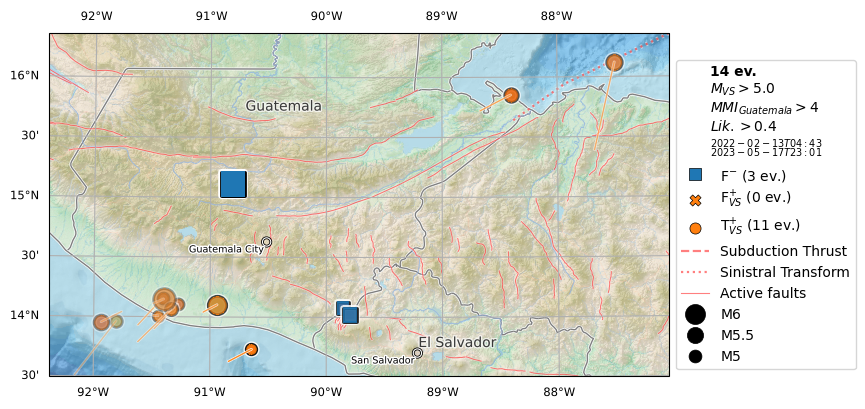

In [4]:

from pyshake.catalog import map 
ax = map(EEWsolutions,
        Refsolutions,
        Mmin=5,
        Lmin=0.4,
        MMImin=4.5, 
        MMIcountry=countryname,
        Mtypes='MVS',    
        )

## Get event informations
Using [table][table]

[table]:pyshake.html#pyshake.catalog.table

In [5]:
from pyshake.catalog import table 

table(EEWsolutions,
        Refsolutions,
        Mmin=5,
        Lmin=0.4,
        MMImin=4.5, 
        MMIcountry=countryname,
        Mtypes='MVS')

27/87 F+ and 425/87 F-


/Users/fred/Documents/Projects/SED-EEW/ATTAC/pyShake/docs/../pyshake/util.py:251: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  events[e].depth = event[2]


,Longitude,Latitude,Depth,Magnitude,Origin time,EEW delay
F-,-90.8052,15.1066,252.000,6.4,2023-05-17T23:01:59.919000Z,None
F-,-89.8596,14.0805,7.997,5.0,2023-01-16T04:47:12.256000Z,None
F-,-89.7977,14.0226,10.000,5.2,2023-01-15T23:07:53.815000Z,None
